In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [223]:
df1 = pd.read_csv("credit_db.csv")
df2 = pd.read_csv("Credit_card_label.csv")
data_df = pd.merge(df1, df2, on='Ind_ID')
data_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [224]:
data_df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [225]:
data_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

# 1
In assignment 6 I didn't import the file with the outcomes so that threw off my whole model. 

In [226]:
# adding in all the missing null values using mode
data_df['GENDER'] = data_df['GENDER'].fillna(data_df['GENDER'].mode())
data_df['Car_Owner'] = data_df['Car_Owner'].fillna(data_df['Car_Owner'].mode())
data_df['Propert_Owner'] = data_df['Propert_Owner'].fillna(data_df['Propert_Owner'].mode())
# adding in all the missing null values using median
data_df['Annual_income'] = data_df['Annual_income'].fillna(data_df['Annual_income'].median())
data_df['Birthday_count'] = data_df['Birthday_count'].fillna(data_df['Birthday_count'].median())

data_df['Type_Occupation'].fillna(value='Other', inplace=True)
data_df['GENDER'].fillna(value='Other', inplace=True)

/var/folders/nh/jxnh82hs01v0q9hm7f66gq640000gn/T/ipykernel_17709/1586327432.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Type_Occupation'].fillna(value='Other', inplace=True)
/var/folders/nh/jxnh82hs01v0q9hm7f66gq640000gn/T/ipykernel_17709/1586327432.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [227]:
# giveing numerical values to all the data
data_df['GENDER'] = data_df['GENDER'].map({'M':0, 'F':1, 'Other':2})
data_df['Car_Owner'] = data_df['Car_Owner'].map({'Y':0, 'N':1})
data_df['Propert_Owner'] = data_df['Propert_Owner'].map({'Y':0, 'N':1})
data_df['Type_Income'] = data_df['Type_Income'].map({'Working':0, 'Commercial associate':1,
                                                    'Pensioner':2, 'State servant':3})
data_df['EDUCATION'] = data_df['EDUCATION'].map({'Secondary / secondary special':0, 'Higher education':1,
                                                    'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4})
data_df['Marital_status'] = data_df['Marital_status'].map({'Married':0, 'Single / not married':1,'Civil marriage':2,
                                                           'Separated':3, 'Widow':4})
data_df['Housing_type'] = data_df['Housing_type'].map({'House / apartment':0, 'With parents':1,'Municipal apartment':2,
                                                           'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5})
data_df['Type_Occupation'] = data_df['Type_Occupation'].map({'Other':0, 'Laborers':1,'Core staff':2,'Managers':3,
                                                             'Sales staff':4, 'Drivers':5,'High skill tech staff':6,
                                                             'Medicine staff':7,'Accountants':8,'Security staff':9,
                                                             'Cleaning staff':10,'Cooking staff':11,'Private service staff':12,
                                                             'Low-skill Laborers':13,'Secretaries':14,'Waiters/barmen staff':15,
                                                             'HR staff':16,'IT staff':17,'Realty agents':18})

In [228]:
data_df = data_df.drop(columns=['Mobile_phone','EMAIL_ID','Phone'])

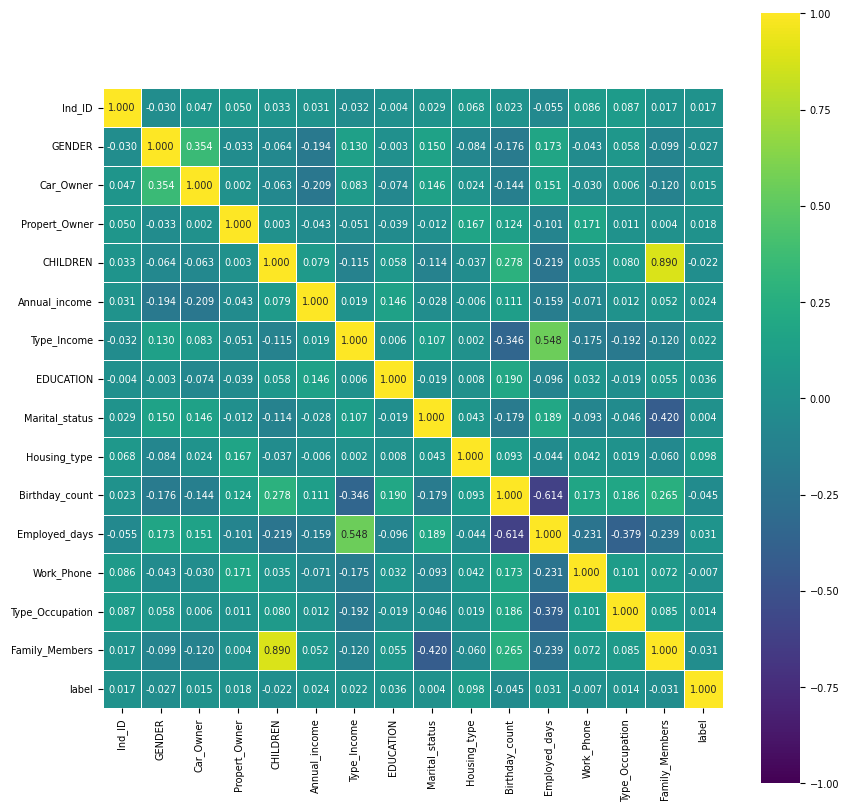

In [229]:
correlation = data_df.corr()
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 7})
sns.heatmap(correlation, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".3f", square=True, linewidths=.7)
plt.show()

In [230]:
# KNN
X = data_df.drop('label', axis = 1)
y = data_df['label']

X_train, X_test, y_train, y_test =  train_test_split(X, y,test_size=0.3,random_state =32)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(y_predict)
print(type(y_predict))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [231]:
print(knn.score(X_test, y_test))

0.8924731182795699


In [232]:
regression = LogisticRegression(random_state=32).fit(X_train, y_train)
y_predicted = regression.predict(X_test)
regression.score(X_test, y_test)

0.8924731182795699

# 2
By the looks of it oversampling and undersampling did not help this modle score better, it decreased the score from .89 to .6 or lower.

In [233]:
# OVER sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [234]:
model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=32)

In [235]:
y_pred = model.predict(X_test)

In [236]:
model.score(X_test, y_test)

0.6043010752688172

In [237]:
# Under Sampling
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state=32)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
model2 = LogisticRegression(random_state=32)
model2.fit(X_resampled, y_resampled)

LogisticRegression(random_state=32)

In [238]:
y_pred2 = model2.predict(X_test)
model2.score(X_test, y_test)

0.5161290322580645

# 3

In [239]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [240]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred2 )

In [241]:
metrics.auc(fpr, tpr)

0.540521978021978

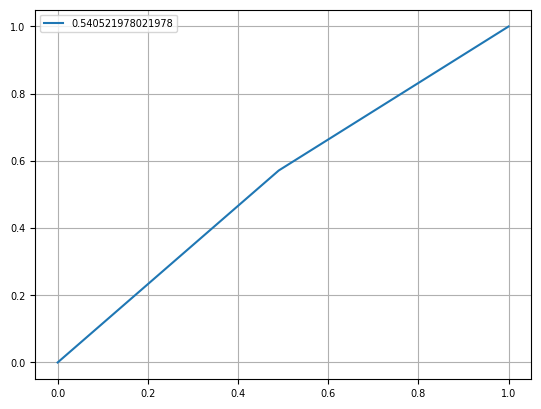

In [242]:
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label=str(roc_auc))
plt.legend()
plt.grid()
plt.show()

# 4
Model got an accuracy score of .89  so it performed better then oversampling or undersampling the data.

In [243]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [244]:
y_pred3 = classifier.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       416
           1       0.00      0.00      0.00        49

    accuracy                           0.89       465
   macro avg       0.45      0.50      0.47       465
weighted avg       0.80      0.89      0.84       465



/Users/kevinpatel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kevinpatel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kevinpatel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# 5
An outlier is a data point that deviates greatly from the other data points within a dataset. Outliers can result from measurement errors, data manipulation or real-world incidents. Outlier detection is the process of discovering data points in a dataset that do not follow the expected pattern or behavior. It is important for things such as fraud detection or whe detecting an anomaly. You can use the z-score to see how far a data point is from the mean. You can also use an interquartile range to spot outliers.